In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For stationarity tests (Augmented Dickey-Fuller)
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Make plots appear inline if using a Jupyter notebook
%matplotlib inline

In [2]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 7.0 MB/s eta 0:00:00


In [3]:
import pingouin as pg

In [4]:
df_raw = pd.read_csv('collected_data.csv', parse_dates=True, index_col=0)

print("Head of raw DataFrame:")
print(df_raw.head(), "\n")

print("Basic info:")
df_raw.info()
print()

print("Summary statistics:")
print(df_raw.describe())

Head of raw DataFrame:
                  SP500  GS10  FEDFUNDS  Inflation
1998-04-30  1111.750000  5.64      5.45        NaN
1998-05-31  1090.819946  5.65      5.49        NaN
1998-06-30  1133.839966  5.50      5.56        NaN
1998-07-31  1120.670044  5.46      5.54        NaN
1998-08-31   957.280029  5.34      5.55        NaN 

Basic info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 1998-04-30 to 2025-03-31
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SP500      324 non-null    float64
 1   GS10       324 non-null    float64
 2   FEDFUNDS   324 non-null    float64
 3   Inflation  312 non-null    float64
dtypes: float64(4)
memory usage: 12.7 KB

Summary statistics:
             SP500        GS10    FEDFUNDS   Inflation
count   324.000000  324.000000  324.000000  312.000000
mean   2093.934594    3.433642    2.148735    2.574260
std    1276.823100    1.370126    2.110931    1.730546
min     735.

In [5]:
# 2A. Identify if any rows have missing values
missing_summary = df_raw.isna().sum()
print("Missing value count per column:\n", missing_summary, "\n")

# 2B. Optionally, remove rows with any missing values
# If the dataset is small, you might prefer forward-fill or interpolation instead of dropping.
df_cleaned = df_raw.dropna()

print("Data after dropping rows with missing values. Shape =", df_cleaned.shape)

Missing value count per column:
 SP500         0
GS10          0
FEDFUNDS      0
Inflation    12
dtype: int64 

Data after dropping rows with missing values. Shape = (312, 4)


### Create Stationary or Differenced Variables

In [6]:
df_cleaned['SP500_Returns'] = df_cleaned['SP500'].pct_change() * 100

<ipython-input-6-e441152c318d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['SP500_Returns'] = df_cleaned['SP500'].pct_change() * 100


In [7]:
df_cleaned['GS10_Change'] = df_cleaned['GS10'].diff()

<ipython-input-7-6fd71bc56769>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['GS10_Change'] = df_cleaned['GS10'].diff()


In [8]:
df_cleaned['FEDFUNDS_Level'] = df_cleaned['FEDFUNDS']

<ipython-input-8-37e3514f45f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['FEDFUNDS_Level'] = df_cleaned['FEDFUNDS']


In [9]:
df_cleaned['Inflation_YoY'] = df_cleaned['Inflation']

<ipython-input-9-208cd172f87b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Inflation_YoY'] = df_cleaned['Inflation']


In [10]:
# 2A. Identify if any rows have missing values
missing_summary_cleaned = df_cleaned.isna().sum()
print("Missing value count per column:\n", missing_summary_cleaned, "\n")

Missing value count per column:
 SP500             0
GS10              0
FEDFUNDS          0
Inflation         0
SP500_Returns     1
GS10_Change       1
FEDFUNDS_Level    0
Inflation_YoY     0
dtype: int64 



In [11]:
# Example: keep only the new/processed columns
df_processed = df_cleaned[['SP500_Returns', 'GS10_Change', 'FEDFUNDS_Level', 'Inflation_YoY']].dropna()
print("Processed data:")
print(df_processed.head())

Processed data:
            SP500_Returns  GS10_Change  FEDFUNDS_Level  Inflation_YoY
1999-05-31      -2.497048         0.36            4.74       2.091021
1999-06-30       5.443833         0.36            4.76       1.965602
1999-07-31      -3.204609        -0.11            4.99       2.144608
1999-08-31      -0.625409         0.15            5.07       2.264382
1999-09-30      -2.855179        -0.02            5.22       2.629969


In [12]:
# df_processed = df_processed.dropna()

In [13]:
missing_summary_processed = df_processed.isna().sum()
print("Missing value count per column:\n", missing_summary_processed, "\n")

Missing value count per column:
 SP500_Returns     0
GS10_Change       0
FEDFUNDS_Level    0
Inflation_YoY     0
dtype: int64 



## EDA (Summary Statistics, Correlations)

### Summary Statistics

In [14]:
print("Summary stats for processed variables:")
print(df_processed.describe())

Summary stats for processed variables:
       SP500_Returns  GS10_Change  FEDFUNDS_Level  Inflation_YoY
count     311.000000   311.000000      311.000000     311.000000
mean        0.558728    -0.002894        2.024341       2.575203
std         4.403950     0.218681        2.061565       1.733254
min       -16.942452    -1.110000        0.050000      -1.958761
25%        -1.868756    -0.140000        0.150000       1.642278
50%         1.106065    -0.010000        1.260000       2.319527
75%         3.305471     0.130000        4.050000       3.301264
max        12.684404     0.650000        6.540000       8.999298


In [15]:
# [code] Partial and Cross-Correlation Analysis
def plot_cross_correlation(series1, series2, max_lag=12, title="Cross-correlation"):
    """
    Plot cross-correlation between two series for lags from -max_lag to max_lag.
    """
    lags = range(-max_lag, max_lag+1)
    corr_values = []
    for lag in lags:
        if lag < 0:
            # Shift series2 backwards by |lag|
            shifted_series2 = series2.shift(-lag)
            corr = series1.corr(shifted_series2)
        elif lag > 0:
            # Shift series1 backwards by lag
            shifted_series1 = series1.shift(lag)
            corr = shifted_series1.corr(series2)
        else:
            corr = series1.corr(series2)
        corr_values.append(corr)

    plt.figure(figsize=(10, 5))
    plt.stem(lags, corr_values)
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.title(title)
    plt.grid(True)
    plt.show()

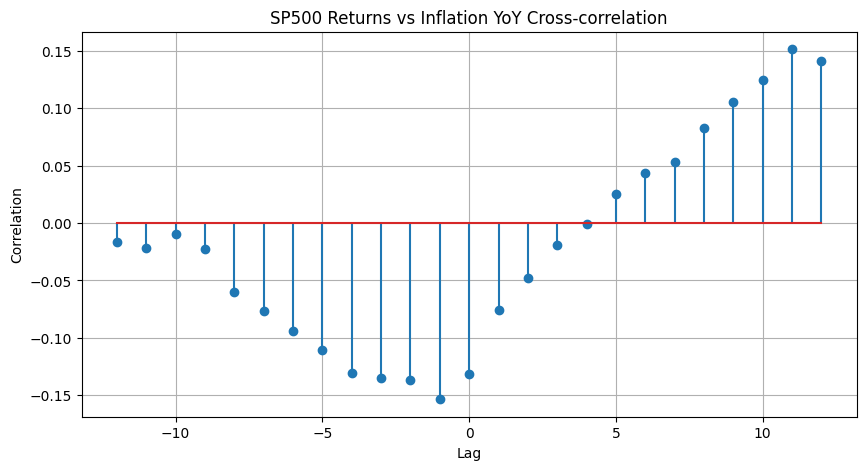

In [16]:
# a maximum lag of 12 (representing one full year) is entirely appropriate. This allows you to observe how the relationship between
# S&P 500 Returns and Inflation YoY evolves over lags up to one year.
# It is a common practice in monthly time series analysis to start with a lag of 12,
# but you can adjust it if you want to explore longer or shorter lag periods.
plot_cross_correlation(df_processed['SP500_Returns'], df_processed['Inflation_YoY'],
                       max_lag=12, title="SP500 Returns vs Inflation YoY Cross-correlation")

In [17]:
partial_corr = pg.partial_corr(data=df_processed, x='SP500_Returns', y='Inflation_YoY', covar='FEDFUNDS_Level')
print("Partial correlation between SP500_Returns and Inflation_YoY (controlling FEDFUNDS_Level):")
print(partial_corr)
print("\n")

Partial correlation between SP500_Returns and Inflation_YoY (controlling FEDFUNDS_Level):
           n         r           CI95%     p-val
pearson  311 -0.121925  [-0.23, -0.01]  0.031869




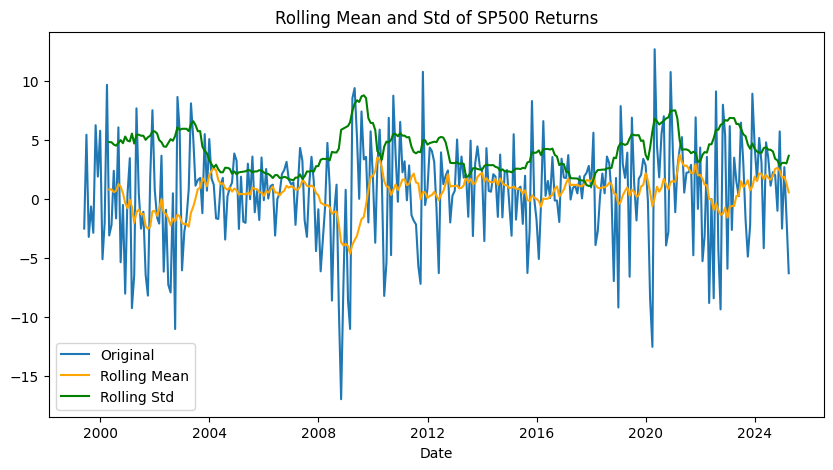

In [18]:
def plot_rolling_statistics(series, window=12, title="Rolling Statistics"):
    """
    Plot the original series along with its rolling mean and rolling standard deviation.
    """
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()

    plt.figure(figsize=(10,5))
    plt.plot(series, label="Original")
    plt.plot(rolling_mean, label="Rolling Mean", color="orange")
    plt.plot(rolling_std, label="Rolling Std", color="green")
    plt.xlabel("Date")
    plt.title(title)
    plt.legend()
    plt.show()

# Example: Rolling statistics for SP500_Returns
plot_rolling_statistics(df_processed['SP500_Returns'], window=12,
                        title="Rolling Mean and Std of SP500 Returns")

### Correlation Matrix

Correlation matrix:
                 SP500_Returns  GS10_Change  FEDFUNDS_Level  Inflation_YoY
SP500_Returns        1.000000     0.108396       -0.050550      -0.131489
GS10_Change          0.108396     1.000000       -0.022485       0.110730
FEDFUNDS_Level      -0.050550    -0.022485        1.000000       0.314640
Inflation_YoY       -0.131489     0.110730        0.314640       1.000000


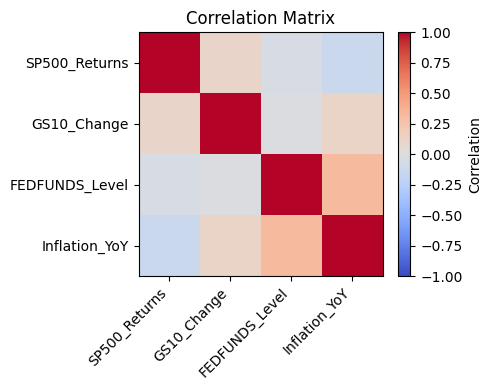

In [19]:
corr_matrix = df_processed.corr()
print("Correlation matrix:\n", corr_matrix)

# Plot the correlation matrix as a heatmap using matplotlib (no seaborn)
plt.figure(figsize=(5, 4))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

### Stationarity Tests

In [20]:
def adf_test(series, title=''):
    """
    Perform ADF stationarity test and print results.
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['Test Statistic','p-value','# Lags Used','Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key,val in result[4].items():
        out[f'Critical Value ({key})'] = val
    print(out.to_string())
    print('---')

adf_test(df_processed['SP500_Returns'], 'S&P 500 Returns')
adf_test(df_processed['GS10_Change'], '10-year Yield Change')
adf_test(df_processed['FEDFUNDS_Level'], 'Federal Funds Rate (level)')
adf_test(df_processed['Inflation_YoY'], 'Inflation YoY')

Augmented Dickey-Fuller Test: S&P 500 Returns
Test Statistic                -1.744727e+01
p-value                        4.673815e-30
# Lags Used                    0.000000e+00
Number of Observations Used    3.100000e+02
Critical Value (1%)           -3.451622e+00
Critical Value (5%)           -2.870909e+00
Critical Value (10%)          -2.571762e+00
---
Augmented Dickey-Fuller Test: 10-year Yield Change
Test Statistic                -1.238823e+01
p-value                        4.854712e-23
# Lags Used                    1.000000e+00
Number of Observations Used    3.090000e+02
Critical Value (1%)           -3.451691e+00
Critical Value (5%)           -2.870939e+00
Critical Value (10%)          -2.571778e+00
---
Augmented Dickey-Fuller Test: Federal Funds Rate (level)
Test Statistic                  -3.070412
p-value                          0.028822
# Lags Used                      5.000000
Number of Observations Used    305.000000
Critical Value (1%)             -3.451974
Critical Val

### Outlier Detection

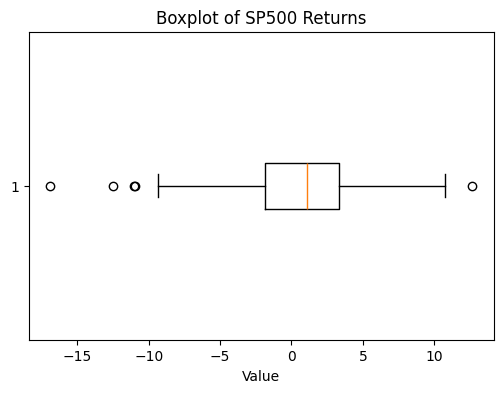

Quantiles for SP500_Returns:
0.01   -10.827765
0.05    -7.953644
0.95     7.465882
0.99     9.644035
Name: SP500_Returns, dtype: float64




In [21]:
# Outlier Detection: Boxplots and Quantile Analysis
def plot_boxplot(series, title="Boxplot for Outlier Detection"):
    """
    Create a boxplot to visually inspect outliers.
    """
    plt.figure(figsize=(6,4))
    plt.boxplot(series.dropna(), vert=False)
    plt.title(title)
    plt.xlabel("Value")
    plt.show()

# Example: Boxplot for SP500_Returns
plot_boxplot(df_processed['SP500_Returns'], title="Boxplot of SP500 Returns")

# You can also examine quantiles if desired:
print("Quantiles for SP500_Returns:")
print(df_processed['SP500_Returns'].quantile([0.01, 0.05, 0.95, 0.99]))
print("\n")

In [22]:
# Seasonality Checks: Seasonal Decomposition
def seasonal_decomp_plot(series, model='additive', period=12, title="Seasonal Decomposition"):
    """
    Decompose the series and plot its seasonal, trend, and residual components.
    """
    result = seasonal_decompose(series.dropna(), model=model, period=period)
    result.plot()
    plt.suptitle(title)
    plt.show()

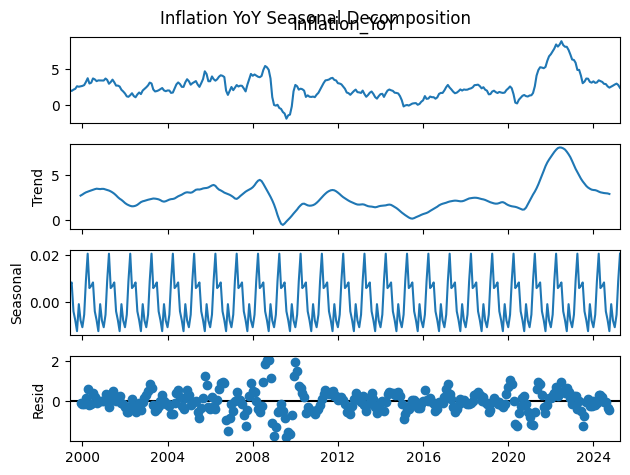

In [23]:
seasonal_decomp_plot(df_processed['Inflation_YoY'], model='additive', period=12,
                     title="Inflation YoY Seasonal Decomposition")

In [24]:
def test_stationarity(series, title="Stationarity Test"):
    """
    Perform the Augmented Dickey-Fuller test and print the results.
    """
    result = adfuller(series.dropna(), autolag='AIC')
    print(f"ADF Test for {title}:")
    print("Test Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    print("\n")

test_stationarity(df_processed['FEDFUNDS_Level'], "Federal Funds Rate (Level)")
test_stationarity(df_processed['Inflation_YoY'], "Inflation YoY")

ADF Test for Federal Funds Rate (Level):
Test Statistic: -3.0704124685616607
p-value: 0.028821703059744096
Critical Values: {'1%': np.float64(-3.451973573620699), '5%': np.float64(-2.8710633193086648), '10%': np.float64(-2.5718441306100512)}


ADF Test for Inflation YoY:
Test Statistic: -3.121542388256725
p-value: 0.024999489154700148
Critical Values: {'1%': np.float64(-3.452713099849546), '5%': np.float64(-2.871387839457783), '10%': np.float64(-2.5720171933352485)}




In [25]:
# If further differencing is desired, create differenced series and test stationarity again:
df_processed['FEDFUNDS_Level_diff'] = df_processed['FEDFUNDS_Level'].diff()
df_processed['Inflation_YoY_diff'] = df_processed['Inflation_YoY'].diff()

test_stationarity(df_processed['FEDFUNDS_Level_diff'].dropna(), "Differenced Federal Funds Rate")
test_stationarity(df_processed['Inflation_YoY_diff'].dropna(), "Differenced Inflation YoY")

ADF Test for Differenced Federal Funds Rate:
Test Statistic: -3.9428321004353606
p-value: 0.0017412894674243907
Critical Values: {'1%': np.float64(-3.451973573620699), '5%': np.float64(-2.8710633193086648), '10%': np.float64(-2.5718441306100512)}


ADF Test for Differenced Inflation YoY:
Test Statistic: -4.636158257744924
p-value: 0.00011073409736799892
Critical Values: {'1%': np.float64(-3.452713099849546), '5%': np.float64(-2.871387839457783), '10%': np.float64(-2.5720171933352485)}




### Visual Time-Series Inspection

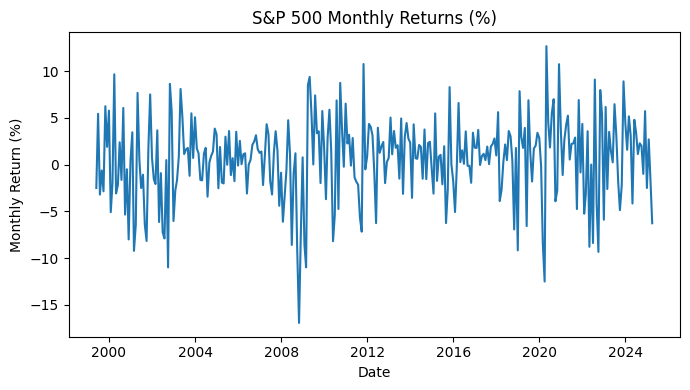

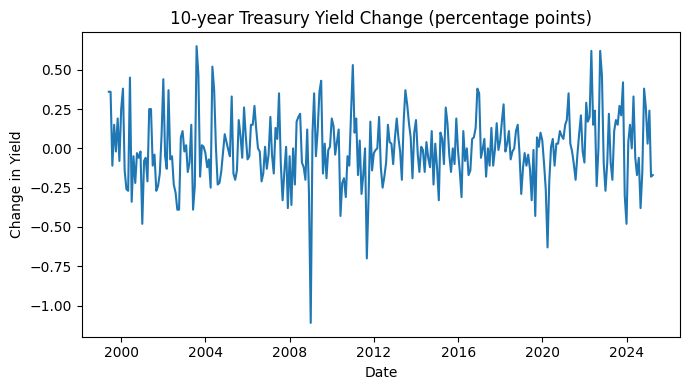

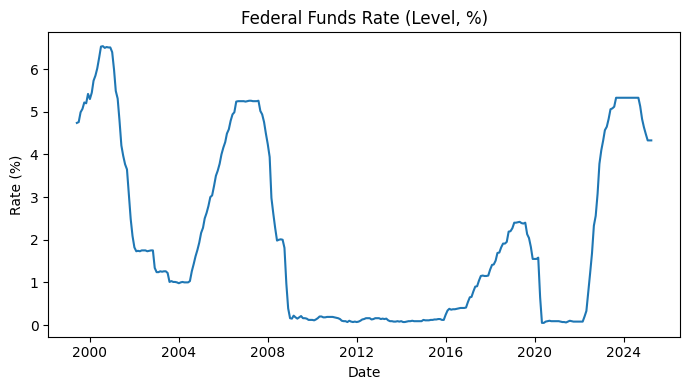

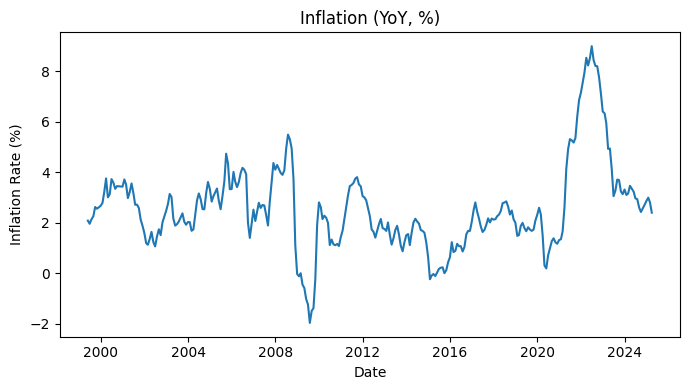

In [26]:
# 6A. Plot each variable over time
plt.figure(figsize=(7, 4))
plt.plot(df_processed.index, df_processed['SP500_Returns'])
plt.title("S&P 500 Monthly Returns (%)")
plt.xlabel("Date")
plt.ylabel("Monthly Return (%)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(df_processed.index, df_processed['GS10_Change'])
plt.title("10-year Treasury Yield Change (percentage points)")
plt.xlabel("Date")
plt.ylabel("Change in Yield")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(df_processed.index, df_processed['FEDFUNDS_Level'])
plt.title("Federal Funds Rate (Level, %)")
plt.xlabel("Date")
plt.ylabel("Rate (%)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(df_processed.index, df_processed['Inflation_YoY'])
plt.title("Inflation (YoY, %)")
plt.xlabel("Date")
plt.ylabel("Inflation Rate (%)")
plt.tight_layout()
plt.show()

### Distribution Plots

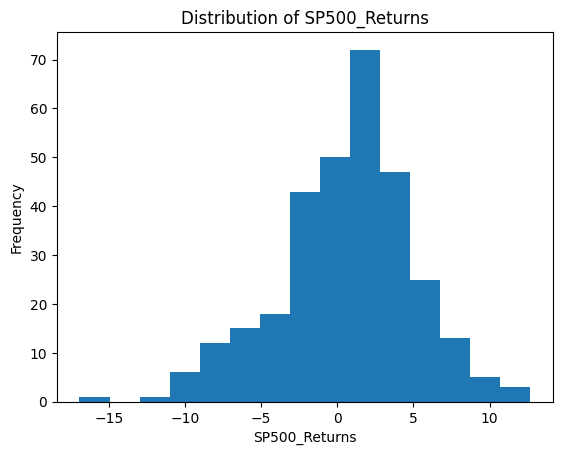

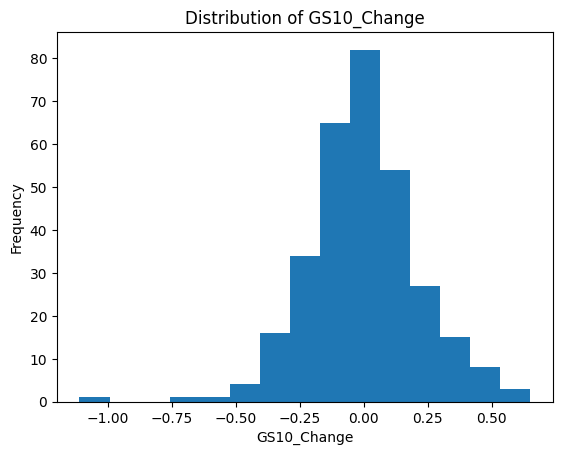

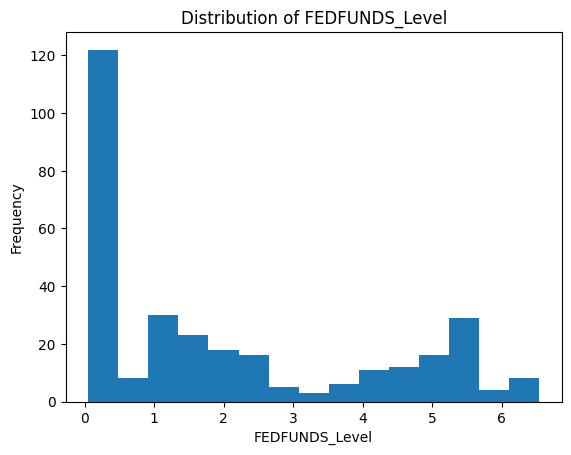

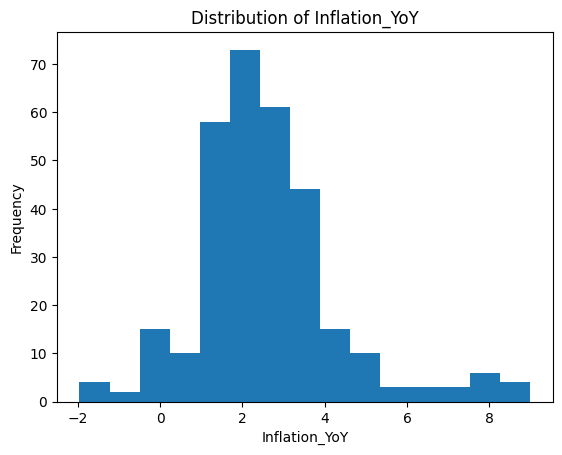

In [27]:
variables = ['SP500_Returns', 'GS10_Change', 'FEDFUNDS_Level', 'Inflation_YoY']
for var in variables:
    plt.figure()
    plt.hist(df_processed[var].dropna(), bins=15)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

In [28]:
df_processed

,SP500_Returns,GS10_Change,FEDFUNDS_Level,Inflation_YoY,FEDFUNDS_Level_diff,Inflation_YoY_diff
1999-05-31,-2.497048,0.36,4.74,2.091021,NaN,NaN
1999-06-30,5.443833,0.36,4.76,1.965602,0.02,-0.125419
1999-07-31,-3.204609,-0.11,4.99,2.144608,0.23,0.179006
1999-08-31,-0.625409,0.15,5.07,2.264382,0.08,0.119774
1999-09-30,-2.855179,-0.02,5.22,2.629969,0.15,0.365588
...,...,...,...,...,...,...
2024-11-30,5.730130,0.26,4.64,2.714168,-0.19,0.142765
2024-12-31,-2.499014,0.03,4.48,2.872366,-0.16,0.158198
2025-01-31,2.701630,0.24,4.33,2.999413,-0.15,0.127046
2025-02-28,-1.424209,-0.18,4.33,2.814270,0.00,-0.185142


In [29]:
df_processed.to_csv('final_processed_data.csv')

In [30]:
import pandas as pd

# Specify the file paths
input_file = 'final_processed_data.csv'
output_file = 'final_processed_data_normalized.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(input_file)

# Normalize numeric columns using min-max scaling (0 to 1)
numeric_columns = df.select_dtypes(include=['number']).columns
for col in numeric_columns:
    col_min = df[col].min()
    col_max = df[col].max()
    # Avoid division by zero in case all values in the column are the same
    if col_max != col_min:
        df[col] = (df[col] - col_min) / (col_max - col_min)
    else:
        df[col] = 0.0

# Write the normalized DataFrame to a new CSV file
df.to_csv(output_file, index=False)

print(f"Normalization complete. The normalized data is saved as: {output_file}")


Normalization complete. The normalized data is saved as: final_processed_data_normalized.csv
